## Plots and analysis to answer research questions

### How are the Hugging Face organizations built (in terms of gender diversity)?
To analyse the organization's composition, we have followed the following steps:
- Fetching from the Hugging Face API the top 1000 most popular models (most downloaded models).

- Grouping by organisations, as there are organisations that have more than one model in the top. From the group by, we kept the more popular model. In this ste, we were left with 363 models.

- Because in the top were users (individual, not being members of any organizations) we took them out and were left with 192 organisations.

- From each organisation we searched all of their members. Again, from the Hugging Face API.

- Then, from every user, we fetched their GitHub user. From there we could retreive the location of that member.

- Having the HF user's name and location we used an LLM to determine the gender of that user.

In [33]:
import pandas as pd
df = pd.read_csv("organisations_summary.csv")
df['num_users'] = df['num_users'].astype('Int64')

users = 0
max = 0
min = 1000
for index, row in df.iterrows():
    num_users = row['num_users']
    users += num_users
    if num_users > max:
        max = num_users
    if num_users < min:
        min = num_users

mean_users = users/len(df)
print("Total number of users:", users)
print("Mean number of members", mean_users)
print("Maximum number of organization members", max)
print("Minimum number of organization members", min)

Total number of users: 14988
Mean number of members 78.0625
Maximum number of organization members 2125
Minimum number of organization members 1


In [34]:
women = 0
max = 0
min = 1000
men = 0
women_percentage = 0
for index, row in df.iterrows():
    num_women = row['num_females']
    per_women = row['% of women']
    num_men = row['num_males']
    men += num_men
    women_percentage += per_women
    women += num_women
    if per_women > max:
        max = per_women
    if per_women < min:
        min = per_women

mean_perc_women = women_percentage/len(df)
print("Total number of women:", women)
print("Total number of men:", men)
print("Mean percentage of women in HF organisations:", mean_perc_women)
print("Maximum % of female members in an organization:", max)
print("Minimum % of female members in an organization:", min)

Total number of women: 1808
Total number of men: 8697
Mean percentage of women in HF organisations: 8.081666666666669
Maximum % of female members in an organization: 50.0
Minimum % of female members in an organization: 0.0


In [35]:
w_0 = 0
for index, row in df.iterrows():
    per_women = row['% of women']
    if per_women == 50.0:
        w_0 += 1

print("Number of organizations with no women:", w_0)

Number of organizations with no women: 4


### Does the popularity (in terms of downloads) of a model have a relation with the gender diversity in the organization developing it?
We assume every user in an organisation can be a model developer.

In [36]:
import pandas as pd
import numpy as np

models = pd.read_csv("models_info.csv")
org_summary = pd.read_csv("organisations_summary.csv")

In [37]:
df = pd.merge(models, org_summary, on='organization', how='right')
df = df.sort_values(by='downloads', ascending=False)

In [38]:
df.to_csv('test.csv', index=False)

In [39]:
df['unknown'] = df['num_users'] - df['num_females'] - df['num_males']
df = df.sort_values(by='downloads', ascending=False)
df.head(20)

,modelId,downloads,organization,num_users,num_females,num_males,% of women,unknown
30,sentence-transformers/all-mpnet-base-v2,296552424.0,sentence-transformers,4,0,4,0.00,0
136,nesaorg/benchmark_v0,118617403.0,nesaorg,2,0,2,0.00,0
33,FacebookAI/xlm-roberta-large,72928929.0,FacebookAI,2,0,2,0.00,0
54,google-bert/bert-base-uncased,70401215.0,google-bert,3,0,3,0.00,0
116,Qwen/Qwen2.5-1.5B-Instruct,43395422.0,Qwen,124,6,65,4.84,53
24,microsoft/resnet-50,31051253.0,microsoft,2125,305,1202,14.35,618
9,openai/clip-vit-large-patch14,29787899.0,openai,54,6,37,11.11,11
109,facebook/opt-1.3b,18146887.0,facebook,463,53,295,11.45,115
66,openai-community/gpt2,16632300.0,openai-community,2,0,2,0.00,0
91,bigscience/bloomz-560m,15217373.0,bigscience,328,56,235,17.07,37


In [40]:
import altair as alt
import pandas as pd

# Assuming df is your original DataFrame with necessary data
df = df.head(15)
df["percent_females"] = df["num_females"] / df["num_users"] * 100
df["percent_males"] = df["num_males"] / df["num_users"] * 100
df["percent_unknown"] = df["unknown"] / df["num_users"] * 100

# Melt the data for non-normalized and normalized values
non_normalized_data = df.melt(
    id_vars=["organization"], 
    value_vars=["num_females", "num_males", "unknown"], 
    var_name="gender", 
    value_name="count"
)
normalized_data = df.melt(
    id_vars=["organization"], 
    value_vars=["percent_females", "percent_males", "percent_unknown"], 
    var_name="gender", 
    value_name="percent"
)

# Merge total users by organization
total_users = non_normalized_data.groupby("organization")["count"].sum().reset_index()
total_users.rename(columns={"count": "total_users"}, inplace=True)

# Merge total users and downloads into the non-normalized data
non_normalized_data = non_normalized_data.merge(total_users, on="organization")
non_normalized_data = non_normalized_data.merge(df[["organization", "downloads"]], on="organization", how="left")

# Create the bar chart
chart = alt.Chart(non_normalized_data).mark_bar().encode(
    x=alt.X("count:Q", title="Count"),
    y=alt.Y("organization:N", title="Organization", sort=alt.EncodingSortField(
                field="downloads",  # Sort by total downloads
                order="descending")),
    color=alt.Color("gender:N", scale=alt.Scale(domain=["num_females", "num_males", "unknown"],
                                                range=["#FF4C4C", "#007B7F", "#1ABC9C"]),
                    legend=alt.Legend(title="Gender",
                                      labelExpr="{'num_females':'Women', 'num_males':'Men', 'unknown':'Unknown'}[datum.label]")),
    tooltip=["organization:N", "gender:N", "count:Q"]
).properties(
    title="Top 20 Organizations: Non-Normalized Gender Distribution",
    width=800,
    height=400
)

# Add text for total users only
text = alt.Chart(total_users).mark_text(
    align='left',
    baseline='middle',
    dx=5  # Adjusts text position
).encode(
    x=alt.X("total_users:Q"),
    y=alt.Y("organization:N", sort="-y"),
    text=alt.Text("total_users:Q")
)

# Combine bar chart and text
final_chart = chart + text
final_chart.show()

alt.LayerChart(...)

In [41]:
# Normalized bar chart
alt.Chart(normalized_data).mark_bar().encode(
    x=alt.X("percent:Q", title="Percentage", stack="normalize"),
    y=alt.Y("organization:N", title="Organization", sort=alt.EncodingSortField(
                field="downloads",  # Sort by total downloads
                order="descending")),
    color=alt.Color("gender:N", scale=alt.Scale(domain=["percent_females", "percent_males", "percent_unknown"],
                                                range=["#FF4C4C", "#007B7F", "#1ABC9C"]),
                    legend=alt.Legend(title="Gender",
                                      labelExpr="{'percent_females':'% Women', 'percent_males':'% Men', 'percent_unknown':'% Unknown'}[datum.label]")),
    tooltip=["organization:N", "gender:N", "percent:Q"]
).properties(
    title="Top 20 Organizations: Normalized Gender Distribution (in %)",
    width=800,
    height=400
)

alt.Chart(...)

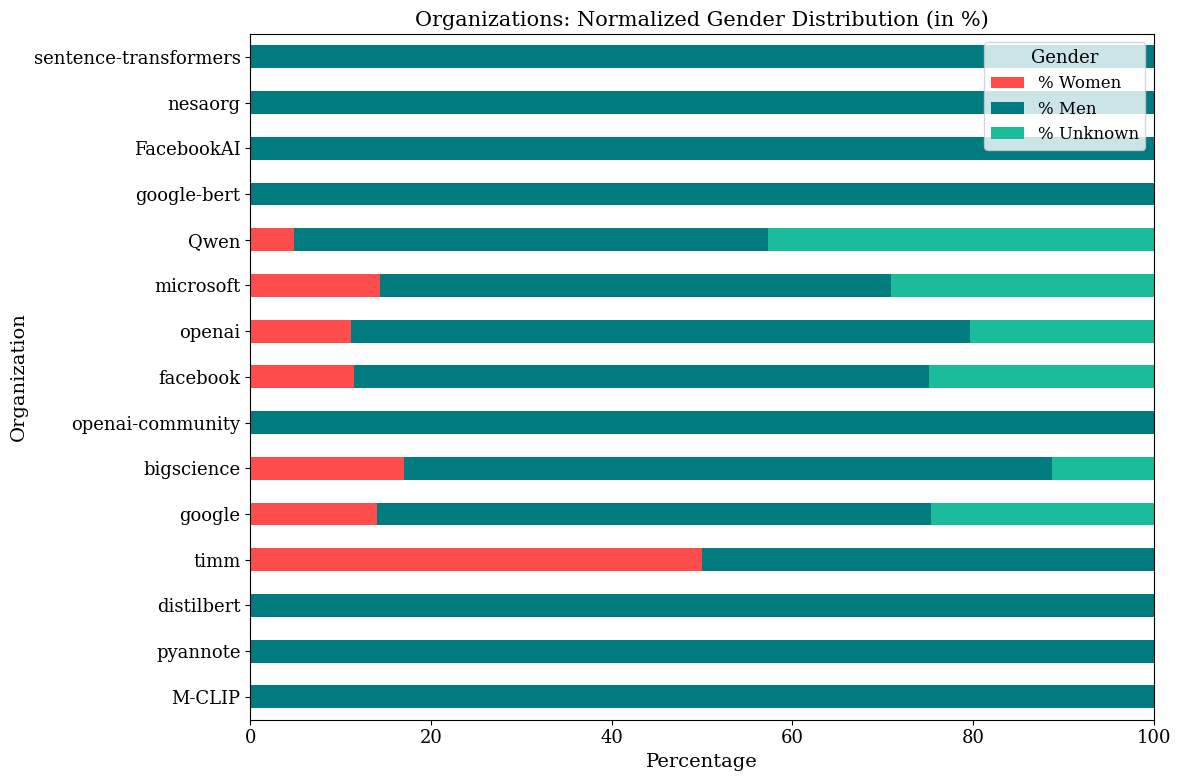

In [68]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

def set_plot_style():
    matplotlib.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,
    })
    plt.rcParams['font.size'] = 13
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['axes.titlesize'] = 15
    plt.rcParams['legend.fontsize'] = 12

set_plot_style()
plt.rcParams['text.usetex'] = False

# Define the custom order of organizations
custom_order = [
    'sentence-transformers', 'nesaorg', 'FacebookAI', 'google-bert', 'Qwen', 
    'microsoft', 'openai', 'facebook', 'openai-community', 'bigscience', 
    'google', 'timm', 'distilbert', 'pyannote', 'M-CLIP'
]

# Pivot the data
df_pivot = normalized_data.pivot(index='organization', columns='gender', values='percent')

# Reorder the DataFrame based on the custom order
df_pivot = df_pivot.reindex(custom_order)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
df_pivot.plot(kind='barh', stacked=True, ax=ax, 
              color=['#FF4C4C', '#007B7F', '#1ABC9C'])

# Customize the plot
ax.set_title("Organizations: Normalized Gender Distribution (in %)")
ax.set_xlabel("Percentage")
ax.set_ylabel("Organization")
ax.legend(title="Gender", labels=['% Women', '% Men', '% Unknown'])
ax.set_xlim(0, 100)

# Reverse y-axis to show values in the order specified
ax.invert_yaxis()

plt.tight_layout()
plt.show()

### How is the behaviour of participants (in terms of commits contribution) inside a Hugging Face model?
#### Are the main commiters men or women?

In [43]:
import os
import pandas as pd

# Rename CSV files
def rename_csv_files(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv_complete.csv") and filename.startswith("GHlocation_"):
            
            new_name = filename.split("_")[1].split(".")[0] + ".csv"
            old_path = os.path.join(folder_path, filename)
            new_path = os.path.join(folder_path, new_name)
            os.rename(old_path, new_path)
            print(f"Renamed: {filename} -> {new_name}")

folder_path = "/home/maria/Escriptori/I2RCED/i2rced/organisations/complete_organisations"

#rename_csv_files(folder_path)

In [44]:
def check_author_gender(csv_path, folder_path):
    input_df = pd.read_csv(csv_path)
    results = []

    for _, row in input_df.iterrows():
        organization_name = row['model_id'].split('/')[0]

        organization_csv_path = os.path.join(folder_path, f"{organization_name}.csv")
        
        if os.path.exists(organization_csv_path):
            org_df = pd.read_csv(organization_csv_path)

            author_name = row['authors']
            author_gender = org_df.loc[org_df['username'] == author_name, 'gender'].values
            if author_gender.size > 0:
                gender = author_gender[0]
            else:
                gender = "Unknown"

        else:
            gender = "Organization CSV not found"

        results.append({
            "model_id": row['model_id'],
            "organization": organization_name,
            "author": row['authors'],
            "count": row['commit_count'],
            "gender": gender
        })

    results_df = pd.DataFrame(results)
    return results_df

df2 = "author_commit_count_by_model.csv"
#author_commits_gender = check_author_gender(df2, folder_path)


#output_path = "author_commits_gender.csv"
#author_commits_gender.to_csv(output_path, index=False)

After removing all those commits that are not from organisations (models that are developed by individuals), this is the commits distribution by gender:

In [45]:
import pandas as pd
data = pd.read_csv("author_commits_gender.csv")

In [46]:
import pandas as pd
import altair as alt

# Assuming 'data' is your CSV DataFrame
# Calculate the top authors by the number of models they committed to
top_authors_by_rows = data['author'].value_counts().head(20).reset_index()
top_authors_by_rows.columns = ['author', 'row_count']

# Extract gender information for the top authors
# Select rows corresponding to top authors
top_authors_gender = data[data['author'].isin(top_authors_by_rows['author'])][['author', 'gender']].drop_duplicates()

# Merge the gender information with the top authors by rows DataFrame
top_authors_by_rows = top_authors_by_rows.merge(top_authors_gender, on='author', how='left')

# Create the Altair chart
chart = alt.Chart(top_authors_by_rows).mark_bar().encode(
    x=alt.X('row_count:Q', title='Models'),
    y=alt.Y('author:N', sort='-x', title='Author'),
    color=alt.Color('gender:N', 
                    scale=alt.Scale(domain=['male', 'female', 'unknown', 'bot'],
                                    range=['#007B7F', '#FF4C4C', '#1ABC9C', '#F9AFAF']),
                    legend=alt.Legend(title='Gender', 
                                      labelExpr="{'male':'Male', 'female':'Female', 'unknown':'Unknown', 'bot':'Bot'}[datum.label]")),
    tooltip=[
        alt.Tooltip('author:N', title='Author'),
        alt.Tooltip('row_count:Q', title='Models'),
        alt.Tooltip('gender:N', title='Gender')
    ]
).properties(
    title='Top 30 Authors by Number of Models they Commited in',
    width=800,
    height=400
).interactive()

# Display the chart
chart.show()

alt.Chart(...)

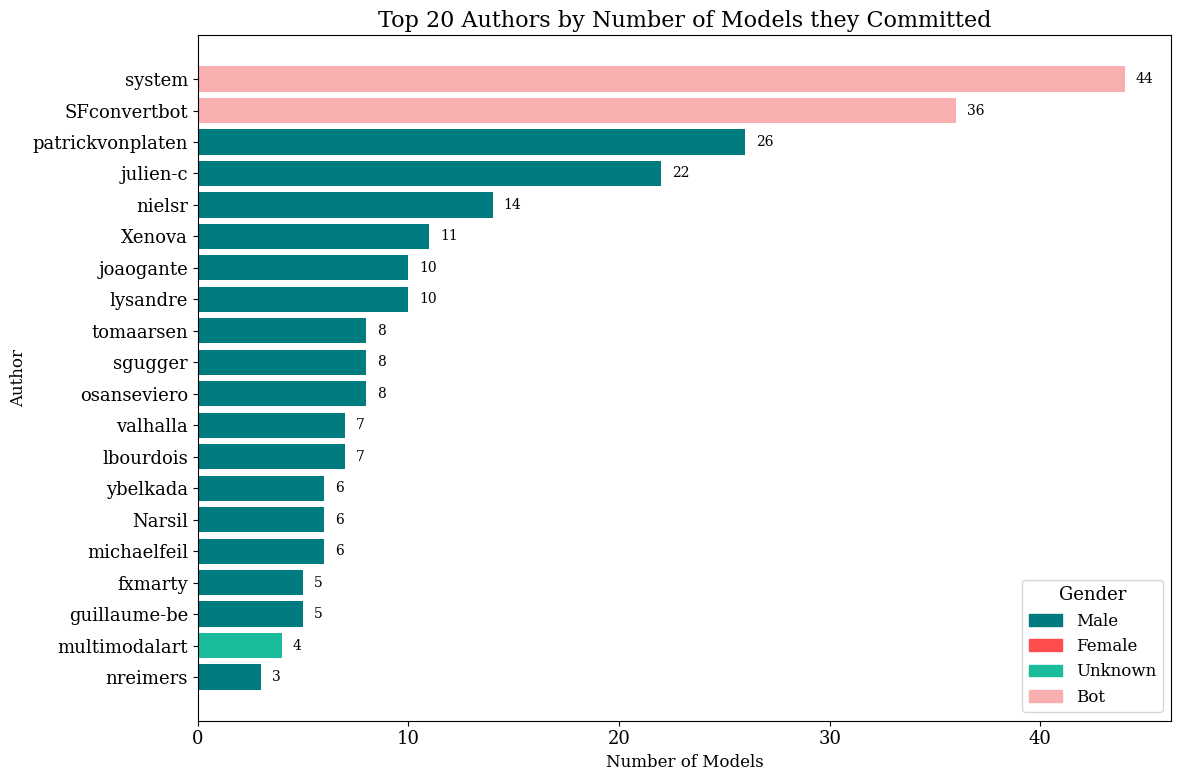

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your CSV DataFrame
# Calculate the top authors by the number of models they committed to
top_authors_by_rows = data['author'].value_counts().head(20).reset_index()
top_authors_by_rows.columns = ['author', 'row_count']

# Extract gender information for the top authors
top_authors_gender = data[data['author'].isin(top_authors_by_rows['author'])][['author', 'gender']].drop_duplicates()

# Merge the gender information with the top authors by rows DataFrame
top_authors_by_rows = top_authors_by_rows.merge(top_authors_gender, on='author', how='left')

# Sort the DataFrame by row_count in descending order
top_authors_by_rows = top_authors_by_rows.sort_values('row_count', ascending=True)

# Create a color map
color_map = {'male': '#007B7F', 'female': '#FF4C4C', 'unknown': '#1ABC9C', 'bot': '#F9AFAF'}

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bars
bars = ax.barh(top_authors_by_rows['author'], top_authors_by_rows['row_count'], 
               color=[color_map.get(gender, '#1ABC9C') for gender in top_authors_by_rows['gender']])

# Customize the plot
ax.set_title('Top 20 Authors by Number of Models they Committed', fontsize=16)
ax.set_xlabel('Number of Models', fontsize=12)
ax.set_ylabel('Author', fontsize=12)

# Add value labels to the end of each bar
for i, v in enumerate(top_authors_by_rows['row_count']):
    ax.text(v + 0.5, i, str(v), va='center', fontsize=10)

# Create legend
legend_elements = [plt.Rectangle((0,0),1,1, color=color_map[gender], label=gender.capitalize()) 
                   for gender in color_map]
ax.legend(handles=legend_elements, title='Gender', loc='lower right')

# Adjust layout and display
plt.tight_layout()
plt.show()


In [47]:
import pandas as pd
import matplotlib.pyplot as plt

top_authors = data.groupby('author')['count'].sum().sort_values(ascending=False).head(15).reset_index()
top_authors.columns = ['author', 'total_commits']

chart = alt.Chart(top_authors).mark_bar().encode(
    x=alt.X('author:N', title='Author', sort='-y'),
    y=alt.Y('total_commits:Q', title='Total Commits'),
    tooltip=[
        alt.Tooltip('author:N', title='Author'),
        alt.Tooltip('total_commits:Q', title='Total Commits')
    ]
).properties(
    title='Top 15 Authors by Total Commits',
    width=800,
    height=400
).configure_axis(
    labelAngle=45  
).interactive()

chart.show()

alt.Chart(...)

In [48]:
import altair as alt

gender_distribution = data.groupby('gender')['count'].sum().reset_index()

colors=["#FF4C4C", "#007B7F", "#1ABC9C", "#F9AFAF"]

chart = alt.Chart(gender_distribution).mark_arc(innerRadius=100).encode(
    theta=alt.Theta(field='count', type='quantitative', stack='zero'),
    color=alt.Color('gender:N', scale=alt.Scale(domain=['female', 'male', 'unknown', 'bot'], range=colors),
                    legend=alt.Legend(title='Gender', 
                                      labelExpr="{'male':'Male', 'female':'Female', 'unknown':'Unknown', 'bot':'Bot'}[datum.label]")),
    tooltip=['gender:N', 'count:Q']
).properties(
    title='Distribution of Commits by Gender',
    width=400,
    height=400
).configure_view(
    stroke=None
).interactive()

chart.show()

alt.Chart(...)

In [49]:
df2 = pd.merge(models, data, on='organization', how='right')
df2 = df2.sort_values(by='downloads', ascending=False)
df2.to_csv("test2.csv", index=False)

In [50]:
df2

,modelId,downloads,organization,model_id,author,count,gender
586,sentence-transformers/all-mpnet-base-v2,296552424,sentence-transformers,sentence-transformers/all-mpnet-base-v2,SFconvertbot,1,bot
587,sentence-transformers/all-mpnet-base-v2,296552424,sentence-transformers,sentence-transformers/all-mpnet-base-v2,espejelomar,7,male
588,sentence-transformers/all-mpnet-base-v2,296552424,sentence-transformers,sentence-transformers/all-mpnet-base-v2,nreimers,4,male
590,sentence-transformers/all-mpnet-base-v2,296552424,sentence-transformers,sentence-transformers/all-mpnet-base-v2,tomaarsen,15,male
589,sentence-transformers/all-mpnet-base-v2,296552424,sentence-transformers,sentence-transformers/all-mpnet-base-v2,system,1,bot
...,...,...,...,...,...,...,...
69,HooshvareLab/bert-fa-base-uncased-ner-peyma,122993,HooshvareLab,HooshvareLab/bert-fa-base-uncased-ner-peyma,patrickvonplaten,2,male
70,HooshvareLab/bert-fa-base-uncased-ner-peyma,122993,HooshvareLab,HooshvareLab/bert-fa-base-uncased-ner-peyma,system,10,bot
584,s-nlp/roberta_toxicity_classifier,121877,s-nlp,s-nlp/roberta_toxicity_classifier,system,1,bot
582,s-nlp/roberta_toxicity_classifier,121877,s-nlp,s-nlp/roberta_toxicity_classifier,dardem,10,female


In [51]:
top_20_downloads = df2.sort_values(by="downloads", ascending=False).drop_duplicates("modelId").head(15)

# Filter the original DataFrame to include only the top 20 models by downloads
filtered_data = df2[df2["modelId"].isin(top_20_downloads["modelId"])]

# Aggregate data to get total commits per model and gender
aggregated_data = filtered_data.groupby(["modelId", "gender"], as_index=False)["count"].sum()

# Sort the aggregated_data by the total number of downloads
aggregated_data = aggregated_data.merge(top_20_downloads[["modelId", "downloads"]], on="modelId", how="left")

# Create the stacked bar chart
bar_chart = alt.Chart(aggregated_data).mark_bar().encode(
    x=alt.X("sum(count):Q", title="Number of Commits"),
    y=alt.Y("modelId:N", title="Model ID",
            sort=alt.EncodingSortField(
                field="downloads",  # Sort by total downloads
                order="descending")),
    color=alt.Color(
        "gender:N",
        scale=alt.Scale(
            domain=["male", "female", "unknown", "bot"],
            range=["#007B7F", "#FF4C4C", "#1ABC9C", "#F9AFAF"]
        ),
        legend=alt.Legend(title="Gender",
                          labelExpr="{'male':'Male', 'female':'Female', 'unknown':'Unknown', 'bot':'Bot'}[datum.label]")),
    tooltip=["modelId:N", "gender:N", "sum(count):Q"]
).properties(
    title="Top 20 Most Downloaded Models: Number of Commits by Gender",
    width=800,
    height=400
)

# Add text labels inside the bars
text = alt.Chart(aggregated_data).mark_text(
    align="center",
    baseline="middle",
    dx=10  # Adjust horizontal position
).encode(
    x=alt.X("sum(count):Q"),
    y=alt.Y("modelId:N", sort="-y"),
    text=alt.Text("sum(count):Q"),
    color=alt.value("black")  # Text color
)

# Combine the bar chart and text
final_chart = bar_chart + text
final_chart

alt.LayerChart(...)

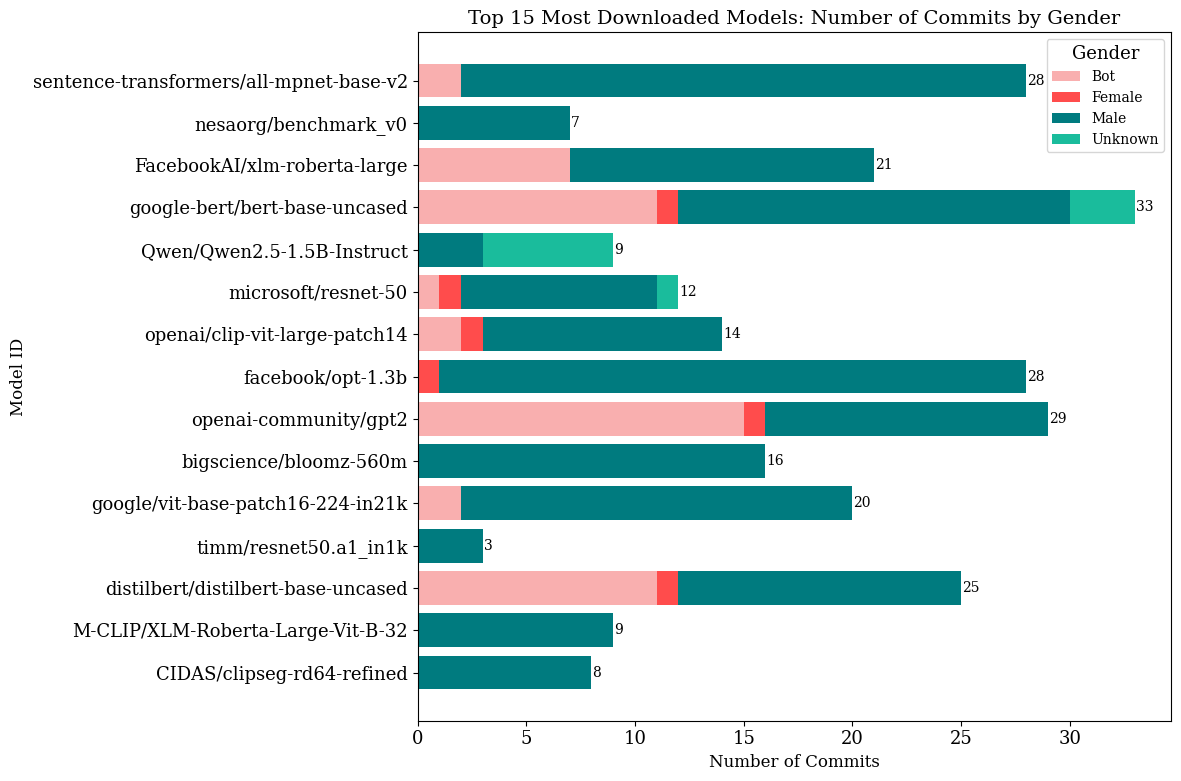

In [88]:
top_20_downloads = aggregated_data.sort_values(by="downloads", ascending=False).drop_duplicates("modelId").head(15)

# Filtrar datos
filtered_data = aggregated_data[aggregated_data["modelId"].isin(top_20_downloads["modelId"])]

desired_order = [
    "sentence-transformers/all-mpnet-base-v2",
    "nesaorg/benchmark_v0",
    "FacebookAI/xlm-roberta-large",
    "google-bert/bert-base-uncased",
    "Qwen/Qwen2.5-1.5B-Instruct",
    "microsoft/resnet-50",
    "openai/clip-vit-large-patch14",
    "facebook/opt-1.3b",
    "openai-community/gpt2",
    "bigscience/bloomz-560m",
    "google/vit-base-patch16-224-in21k",
    "timm/resnet50.a1_in1k",
    "distilbert/distilbert-base-uncased",
    "M-CLIP/XLM-Roberta-Large-Vit-B-32",
    "CIDAS/clipseg-rd64-refined"
]

# Reordenar el DataFrame según el orden deseado
filtered_data["modelId"] = pd.Categorical(filtered_data["modelId"], categories=desired_order, ordered=True)
#filtered_data = filtered_data.sort_values("modelId")

# Extraer categorías de género y colores
categories = ["bot", "female", "male", "unknown"]
colors = {
    "bot": "#F9AFAF",
    "female": "#FF4C4C",
    "male": "#007B7F",
    "unknown": "#1ABC9C"
}

# Preparar datos para apilado
y = filtered_data["modelId"]
width = np.zeros(len(filtered_data))

# Crear gráfico
fig, ax = plt.subplots(figsize=(12, 8))

for category in categories:
    ax.barh(
        y,
        filtered_data[category],
        label=category.capitalize(),
        color=colors[category],
        left=width
    )
    width += filtered_data[category]

# Agregar etiquetas de texto con el total de commits
total_commits = filtered_data[categories].sum(axis=1)
for i, total in enumerate(total_commits):
    ax.text(
        total + 0.05,  # Posición a la derecha de la barra
        i,  # Índice de la barra
        str(total),  # Texto a mostrar
        va='center', fontsize=10
    )

# Etiquetas y leyenda
ax.set_title("Top 15 Most Downloaded Models: Number of Commits by Gender", fontsize=14)
ax.set_xlabel("Number of Commits", fontsize=12)
ax.set_ylabel("Model ID", fontsize=12)
ax.legend(title="Gender", fontsize=10)

# Ajustar estilo
plt.tight_layout()
plt.show()

In [79]:
filtered_data

,modelId,bot,female,male,unknown,downloads
0,CIDAS/clipseg-rd64-refined,0,0,8,0,7998214
2,M-CLIP/XLM-Roberta-Large-Vit-B-32,0,0,9,0,11061001
5,distilbert/distilbert-base-uncased,11,1,13,0,14891526
14,timm/resnet50.a1_in1k,0,0,3,0,15160276
8,google/vit-base-patch16-224-in21k,2,0,18,0,15187661
4,bigscience/bloomz-560m,0,0,16,0,15217373
11,openai-community/gpt2,15,1,13,0,16632300
6,facebook/opt-1.3b,0,1,27,0,18146887
12,openai/clip-vit-large-patch14,2,1,11,0,29787899
9,microsoft/resnet-50,1,1,9,1,31051253


In [52]:
top_20_downloads = df2.sort_values(by="downloads", ascending=False).drop_duplicates("modelId").head(20)

# Filter the original DataFrame to include only the top 20 models by downloads
filtered_data = df2[df2["modelId"].isin(top_20_downloads["modelId"])]

# Aggregate data to get total commits per model and gender
aggregated_data = filtered_data.groupby(["modelId", "gender"], as_index=False)["count"].sum()

# Merge the 'downloads' field into the aggregated data to sort by downloads
aggregated_data = aggregated_data.merge(top_20_downloads[["modelId", "downloads"]], on="modelId", how="left")

# Normalize the 'count' column by dividing by the total commits per model
aggregated_data["percentage"] = aggregated_data.groupby("modelId")["count"].transform(lambda x: 100 * x / x.sum())

colors = ["#FF4C4C", "#007B7F", "#1ABC9C", "#F9AFAF"]

# Create the stacked bar chart
alt.Chart(aggregated_data).mark_bar().encode(
    x=alt.X("percentage:Q", title="Percentage of Commits"),
    y=alt.Y("modelId:N", title="Model ID",
            sort=alt.EncodingSortField(
                field="downloads",  # Sort by total downloads
                order="descending")),
    color=alt.Color(
        "gender:N",
        scale=alt.Scale(
            domain=["male", "female", "unknown", "bot"],
            range=colors
        ),
        legend=alt.Legend(title="Gender",
                          labelExpr="{'male':'Male', 'female':'Female', 'unknown':'Unknown', 'bot':'Bot'}[datum.label]")),
    
    tooltip=["modelId:N", "gender:N", "percentage:Q"]
).properties(
    title="Top 20 Most Downloaded Models: % of Commits by Gender",
    width=800,
    height=400
)

alt.Chart(...)

In [53]:
import altair as alt
import pandas as pd

# First chart data
gender_distribution1 = pd.DataFrame({
    'gender': ['female', 'male', 'unknown'],
    'count': [9, 60, 31]
})

# Second chart data
gender_distribution2 = pd.DataFrame({
    'gender': ['female', 'male', 'unknown'],
    'count': [1808, 8696, 4484]
})

# Colors for both charts
colors = ["#FF4C4C", "#007B7F", "#1ABC9C"]

# First chart
chart1 = alt.Chart(gender_distribution1).mark_arc(innerRadius=100).encode(
    theta=alt.Theta(field='count', type='quantitative', stack='zero'),
    color=alt.Color(
        'gender:N',
        scale=alt.Scale(domain=['female', 'male', 'unknown'], range=colors),
        legend=alt.Legend(title='Gender', labelExpr="{'male':'Male', 'female':'Female', 'unknown':'Unknown'}[datum.label]")
    ),
    tooltip=['gender:N', 'count:Q']
).properties(
    title='',
    width=400,
    height=400
)

# Second chart
chart2 = alt.Chart(gender_distribution2).mark_arc(innerRadius=100).encode(
    theta=alt.Theta(field='count', type='quantitative', stack='zero'),
    color=alt.Color(
        'gender:N',
        scale=alt.Scale(domain=['female', 'male', 'unknown'], range=colors),
        legend=None  # Avoid duplicate legends
    ),
    tooltip=['gender:N', 'count:Q']
).properties(
    title='',
    width=400,
    height=400
)

# Combine charts side by side
combined_chart = chart1 | chart2
combined_chart.show().configure_view(
    stroke=None
)


alt.HConcatChart(...)

AttributeError: 'NoneType' object has no attribute 'configure_view'